<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# import the XGBoost function for classification
import xgboost
from xgboost import XGBClassifier
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

#### Read the data

Load the csv file and print the first five observations.

In [2]:
df=pd.read_csv('seedtype_data.csv')
df.head(4)

,Area,Perimeter,Kernel_len,Kernel_width,Kernelgroove_len,Type
0,12.760000,13.380000,5.073000,3.155000,4.830000,0.000000
1,12.130000,13.730000,5.394000,3.745000,5.220000,0.000000
2,14.860000,14.670000,NaN,3.258000,5.351000,0.000000
3,15.690000,14.750000,5.527000,3.514000,5.046000,0.000000


**The data definition is as follows:** <br>

**Area**: Area of the wheat kernel 

**Perimeter**: Perimeter of the wheat kernel

**Kernel_len**: Length of the wheat kernel

**Kernel_width**: Width of the wheat kernel

**Kernelgroove_len**: Length of the wheat kernel groove

**Type**: Type of the wheat seed (0 = Kama Wheat, 1 = Rosa Wheat) (target/dependent variable)

Our objective is to predict whether the wheat seed is of Kama or Rosa type.

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is there any record where no data have been reported? If yes, do the needful</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i].fillna(method='ffill',inplace=True)
    else:
        if df[i].skew() <-0.5 or df[i].skew() > 0.5:
            df[i].fillna(df[i].median(),inplace=True)
        else:
            df[i].fillna(df[i].mean(),inplace=True)

In [5]:
df.isnull().sum()

Area                0
Perimeter           0
Kernel_len          0
Kernel_width        0
Kernelgroove_len    0
Type                0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Use the visualization technique to identify the variables with missing data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

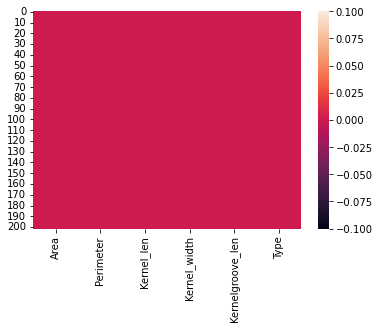

In [7]:
# Remove Null values
sns.heatmap(df.isnull())

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Use the appropriate technique to replace the missing data in the variable representing the length of a wheat kernel
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# the missing data in the variable representing the length of a wheat kernel.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Identify the variables containing extreme values and remove such observations, if present
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

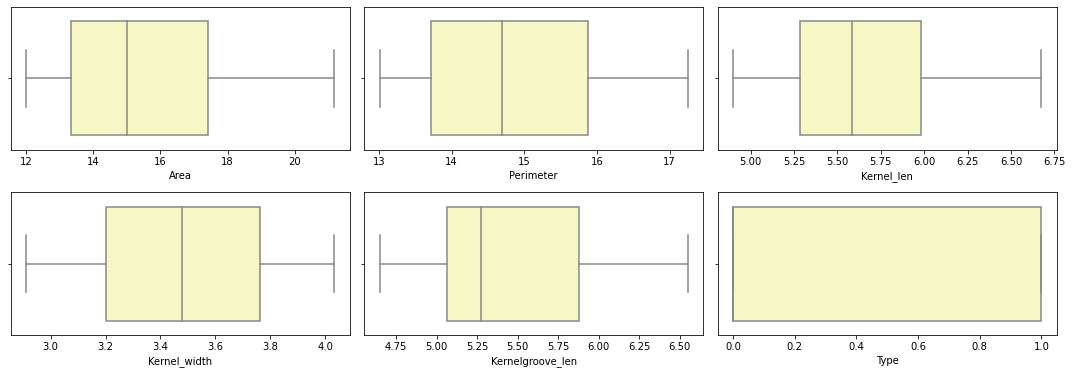

In [9]:
# Before removing Outliers
n=1
plt.figure(figsize=(15,10))
for i in df.columns:
    if df[i].dtypes!='object':
        plt.subplot(4,3,n)
        n+=1
        sns.boxplot(df[i],palette='Spectral')
        plt.tight_layout()

In [10]:
# There is no outliers present in data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Apply the gradient boosting on 80% of the data with 250 estimators each of maximum depth 2. Also, calculate the precision and sensitivity using the confusion matrix
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Type']),df['Type'],test_size=0.3,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(141, 5)
(61, 5)
(141,)
(61,)


In [12]:
grad_model=GradientBoostingClassifier(n_estimators=250,max_depth=2)
grad_model.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=250)

In [14]:
y_pred=grad_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        39
         1.0       1.00      0.86      0.93        22

    accuracy                           0.95        61
   macro avg       0.96      0.93      0.94        61
weighted avg       0.95      0.95      0.95        61



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Create 80 stumps using AdaBoost and plot the ROC curve along with the AUC score
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
ada_model=AdaBoostClassifier(n_estimators=80)
ada_model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=80)

In [16]:
y_pred=grad_model.predict(x_test)

Text(0.02, 0.9, "('AUC Score:', 0.9895)")

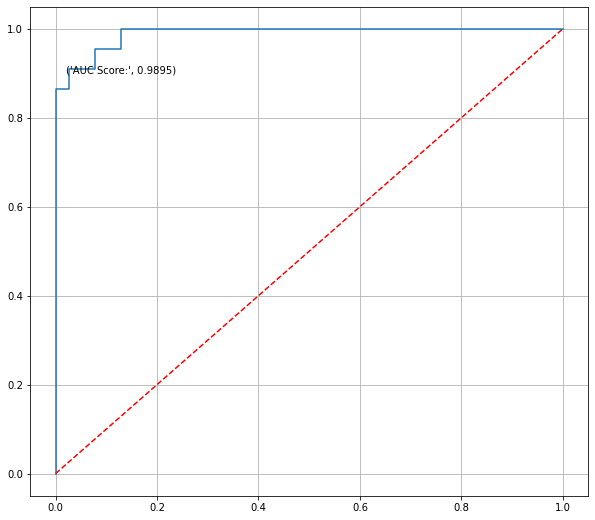

In [17]:
plt.figure(figsize=(10,9))
fpr,tpr,thresholds=roc_curve(y_test,grad_model.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.grid(True)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test,grad_model.predict_proba(x_test)[:,1] ),4)))

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Select the optimal maximum depth from the given values for 180 base learners to build the gradient boosting classifier (consider 3-fold cross validation)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Use the given list:**

depth = [2, 3, 4, 5, 6, 7, 8]

In [21]:
tuned_param=[{'n_estimators':[180],'max_depth':[2, 3, 4, 5, 6, 7, 8]}]

In [22]:
Grad_model=GradientBoostingClassifier()
grad_model=GridSearchCV(estimator=Grad_model,param_grid=tuned_param,cv=3)
grad_model.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid=[{'max_depth': [2, 3, 4, 5, 6, 7, 8],
                          'n_estimators': [180]}])

In [24]:
grad_model.best_params_

{'max_depth': 2, 'n_estimators': 180}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build the XGBoost model with a learning rate of 0.4 and gamma equal to 3. Calculate the accuracy by plotting the confusion matrix
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
xgb=XGBClassifier(learning_rate=0.4,gamma=3)
xg_model=xgb.fit(x_train,y_train)
xg_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.4, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

<AxesSubplot:>

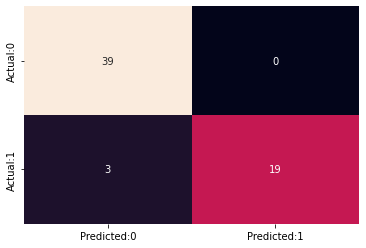

In [26]:
cm=confusion_matrix(y_test,xg_model.predict(x_test))
matrix=pd.DataFrame(data=cm,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
sns.heatmap(data=matrix,annot=True,fmt='d',cbar=False)

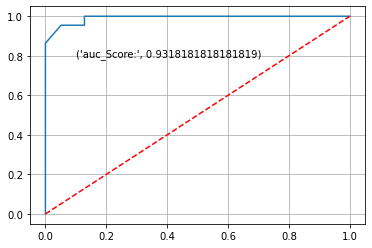

In [28]:
fpr,tpr,thresholds=roc_curve(y_test,xg_model.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.1,y=0.8,s=('auc_Score:',metrics.roc_auc_score(y_test,y_pred)))
plt.grid(True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Use the stacking technique on 70% of the data with the 9-NN and Naive Bayes model as base learners. Consider the Adaboost model as a final estimator. Also, compute the AUC score of the model </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
base_learners = [('rf_model', GaussianNB()),
                 ('KNN_model', KNeighborsClassifier(n_neighbors = 9, metric = 'euclidean')),
                 ('NB_model', AdaBoostClassifier())]

stack_model = StackingClassifier(estimators = base_learners, final_estimator = AdaBoostClassifier())
stack_model.fit(x_train, y_train)

StackingClassifier(estimators=[('rf_model', GaussianNB()),
                               ('KNN_model',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=9)),
                               ('NB_model', AdaBoostClassifier())],
                   final_estimator=AdaBoostClassifier())

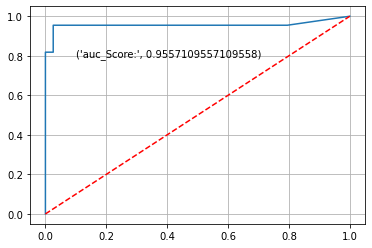

In [30]:
fpr,tpr,thresholds=roc_curve(y_test,stack_model.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.1,y=0.8,s=('auc_Score:',metrics.roc_auc_score(y_test,stack_model.predict_proba(x_test)[:,1])))
plt.grid(True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Use the base learners in Q9 and build a stacking model with the XGBoost as final estimator. Compute the AUC score of the model and compare it with the result of Q9 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
base_learners = [('rf_model', GaussianNB()),
                 ('KNN_model', KNeighborsClassifier(n_neighbors = 9, metric = 'euclidean')),
                 ('NB_model', XGBClassifier())]

stack_model = StackingClassifier(estimators = base_learners, final_estimator = XGBClassifier())
stack_model.fit(x_train, y_train)

StackingClassifier(estimators=[('rf_model', GaussianNB()),
                               ('KNN_model',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=9)),
                               ('NB_model',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None, gamma=None,
                                              gpu_id=...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None,
                                                 random_state=None,
                                                 reg_alpha=None,
                                                 reg_lambda=None, ...))

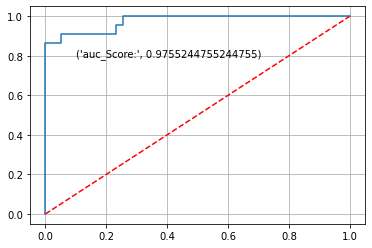

In [32]:
fpr,tpr,thresholds=roc_curve(y_test,stack_model.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.text(x=0.1,y=0.8,s=('auc_Score:',metrics.roc_auc_score(y_test,stack_model.predict_proba(x_test)[:,1])))
plt.grid(True)